In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import	KMeans
from sklearn.decomposition import PCA

In [2]:
wd = pd.read_csv("wine.csv")

print(wd.describe())       #shows the summary

wd.info()                 #shows the info and missing values

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [3]:
#now we'll drop the unnecessary colum
wd1 = wd.drop(["Type"] , axis =1 )

#now we'll normalize the data to a range 0-1.
def norm_func(i):
    x = (i - i.max())/ (i.max()-i.min())
    return(x)
norm_wda = norm_func(wd1)
norm_wda.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,-0.481416,-0.684516,-0.461756,-0.541498,-0.676722,-0.546513,-0.643614,-0.562540,-0.627477,-0.677637,-0.611830,-0.508540,-0.665554
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.649342,-0.829545,-0.545455,-0.659794,-0.804348,-0.737069,-0.817511,-0.735849,-0.735016,-0.834471,-0.754065,-0.755495,-0.841298
50%,-0.468421,-0.777668,-0.465241,-0.541237,-0.695652,-0.525862,-0.621308,-0.603774,-0.638801,-0.709044,-0.605691,-0.446886,-0.717903
75%,-0.303289,-0.537055,-0.359626,-0.438144,-0.597826,-0.372414,-0.465190,-0.419811,-0.514196,-0.580205,-0.479675,-0.304029,-0.495720
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


                                                   CLUSTER (H_clust , K_means)

                                                   
z = linkage(norm_wda, method = "complete", metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [5]:
wd_comp = AgglomerativeClustering(n_clusters = 3 , linkage = "complete" ,affinity = "euclidean" ).fit(norm_wda)


In [7]:
wd_cluster_column = pd.Series(wd_comp.labels_)

#now assign this matrix to to data set as a new column.

wd1['grouping']=wd_cluster_column

#now take the grouping column to the 1st.

wd_h = wd1.iloc[ : ,[13,0,1,2,3,4,6,7,8,9,10,11,12] ]


In [8]:
                                                  
###### scree plot or elbow curve ############
TWSS = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_wda)
    TWSS.append(kmeans.inertia_)
    
TWSS

[95.59953778471063,
 64.5376670238943,
 48.960517136676465,
 44.769330540824775,
 42.464914471797556,
 39.77246431500699,
 38.36371859659024,
 36.142418675736074,
 34.506804552786996]

Text(0, 0.5, 'total_within_SS')

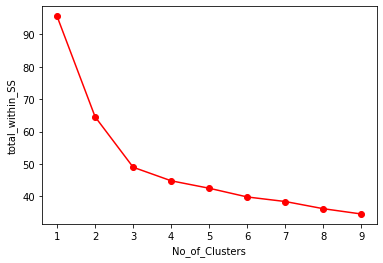

In [9]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [10]:

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(norm_wda)


KMeans(n_clusters=3)

In [11]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object  
wd1['category'] = mb # creating a  new column and assigning it to new column 
wd_k = wd1.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12]]


                                                          PCA

In [12]:
                                                          
wdp = pd.read_csv("wine.csv")
wdp.drop(["Type"] , axis =1 ,inplace = True)

norm_wdp = norm_func(wd)
print(norm_wdp.describe())
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(norm_wdp)

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    -0.530899   -0.481416   -0.684516   -0.461756   -0.541498   -0.676722   
std      0.387517    0.213639    0.220780    0.146708    0.172142    0.155244   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -0.649342   -0.829545   -0.545455   -0.659794   -0.804348   
50%     -0.500000   -0.468421   -0.777668   -0.465241   -0.541237   -0.695652   
75%      0.000000   -0.303289   -0.537055   -0.359626   -0.438144   -0.597826   
max      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean    -0.546513   -0.643614      -0.562540        -0.627477   -0.677637   
std      0.215811    0.210730       0.2

In [13]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var


array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412])

In [14]:
print(pca.components_)

# Cumulative variance 

var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

[[ 0.6293282  -0.11538334  0.18694541 -0.00605884  0.14898351 -0.06546653
  -0.29907772 -0.32479936  0.23920701 -0.18419798  0.08078851 -0.20189805
  -0.37170465 -0.2400427 ]
 [ 0.01993018 -0.54791647 -0.2344791  -0.16351603  0.07620456 -0.18485315
  -0.06219328  0.01015402 -0.02206778 -0.02268177 -0.52014852  0.24253447
   0.22768572 -0.43761144]
 [ 0.03341574 -0.08752348  0.49369469  0.39251169  0.47666736  0.01701346
   0.26790425  0.20701857  0.23278396  0.24925826 -0.02422129 -0.1201589
   0.30702977 -0.16025723]
 [-0.29258342  0.06222583 -0.17547483  0.20681556  0.04089069 -0.11406464
  -0.10022125 -0.07451451  0.79752561 -0.22126034 -0.08760114  0.27479592
  -0.08399171  0.17729834]
 [ 0.28148105 -0.16228821 -0.66493451  0.23497092  0.28992581  0.27654331
   0.20490882  0.12531803  0.0069295   0.25398196  0.27044136  0.11354174
  -0.16460973  0.0342759 ]
 [-0.13118319 -0.04725362  0.07955381  0.37438456  0.29955875  0.48981477
  -0.32001877 -0.1577103  -0.34549364 -0.37660733 -0

array([51.  , 65.85, 72.55, 78.81, 83.82, 87.66, 90.54, 92.5 , 94.33,
       96.1 , 97.58, 98.66, 99.5 ])

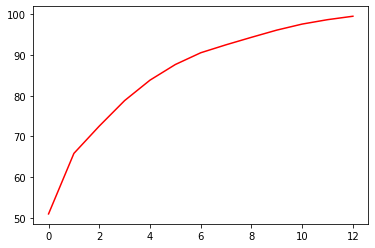

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [26]:
#PCA scores
print(pca_values)
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5" , "comp6" ,"comp7" ,"comp8" ,"comp9" ,"comp10" ,"comp11" , "comp12"

pca_data

[[-0.84760416 -0.24314632  0.02975173 ...  0.08950002 -0.04750287
   0.04539759]
 [-0.6786508  -0.00571174 -0.28396974 ...  0.09822276 -0.07880283
   0.05536931]
 [-0.70037223 -0.18386807  0.19745712 ... -0.03025584 -0.03573774
   0.07481563]
 ...
 [ 0.82065832 -0.55246914 -0.02074951 ...  0.09275238 -0.10336217
  -0.11764654]
 [ 0.77726837 -0.4302553  -0.09551105 ...  0.10501336 -0.01389598
  -0.03257465]
 [ 0.8758746  -0.52183358  0.28745683 ... -0.07514722  0.02991871
   0.00410332]]


,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728,0.038810,0.049146,0.114127,-0.107955,0.291353,0.089500,-0.047503,0.045398
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171,-0.026104,-0.013032,-0.135043,0.082117,0.092704,0.098223,-0.078803,0.055369
2,-0.700372,-0.183868,0.197457,0.004297,0.049228,-0.044054,0.141187,-0.086726,-0.167860,-0.148520,-0.030256,-0.035738,0.074816
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336,-0.106658,-0.071420,-0.093214,0.079009,0.026887,0.159666,0.118646,-0.000236
4,-0.454077,-0.063348,0.286092,0.179782,0.008012,0.182285,0.067237,-0.035410,0.058584,0.101458,-0.195057,-0.009654,0.009707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,0.012476,-0.342452,-0.032776,0.066883,0.070463,0.060195,-0.048335,0.085700,-0.029515,0.008320
174,0.785427,-0.353231,0.088418,-0.075360,0.008066,0.043131,0.044505,0.067033,-0.006887,-0.092515,0.024457,0.062745,-0.004699
175,0.820658,-0.552469,-0.020750,-0.166405,-0.015765,0.021907,0.193634,-0.036957,-0.004505,0.051149,0.092752,-0.103362,-0.117647
176,0.777268,-0.430255,-0.095511,0.051361,0.215166,-0.044780,0.161557,-0.064202,-0.063602,0.155148,0.105013,-0.013896,-0.032575


In [30]:
wine = pd.concat([wd.Type, pca_data.iloc[:, 0:3]], axis = 1)
wine

,Type,comp0,comp1,comp2
0,1,-0.847604,-0.243146,0.029752
1,1,-0.678651,-0.005712,-0.283970
2,1,-0.700372,-0.183868,0.197457
3,1,-0.936076,-0.566967,0.093919
4,1,-0.454077,-0.063348,0.286092
...,...,...,...,...
173,3,0.898916,-0.482112,0.203259
174,3,0.785427,-0.353231,0.088418
175,3,0.820658,-0.552469,-0.020750
176,3,0.777268,-0.430255,-0.095511


                                               Clustering after PCA

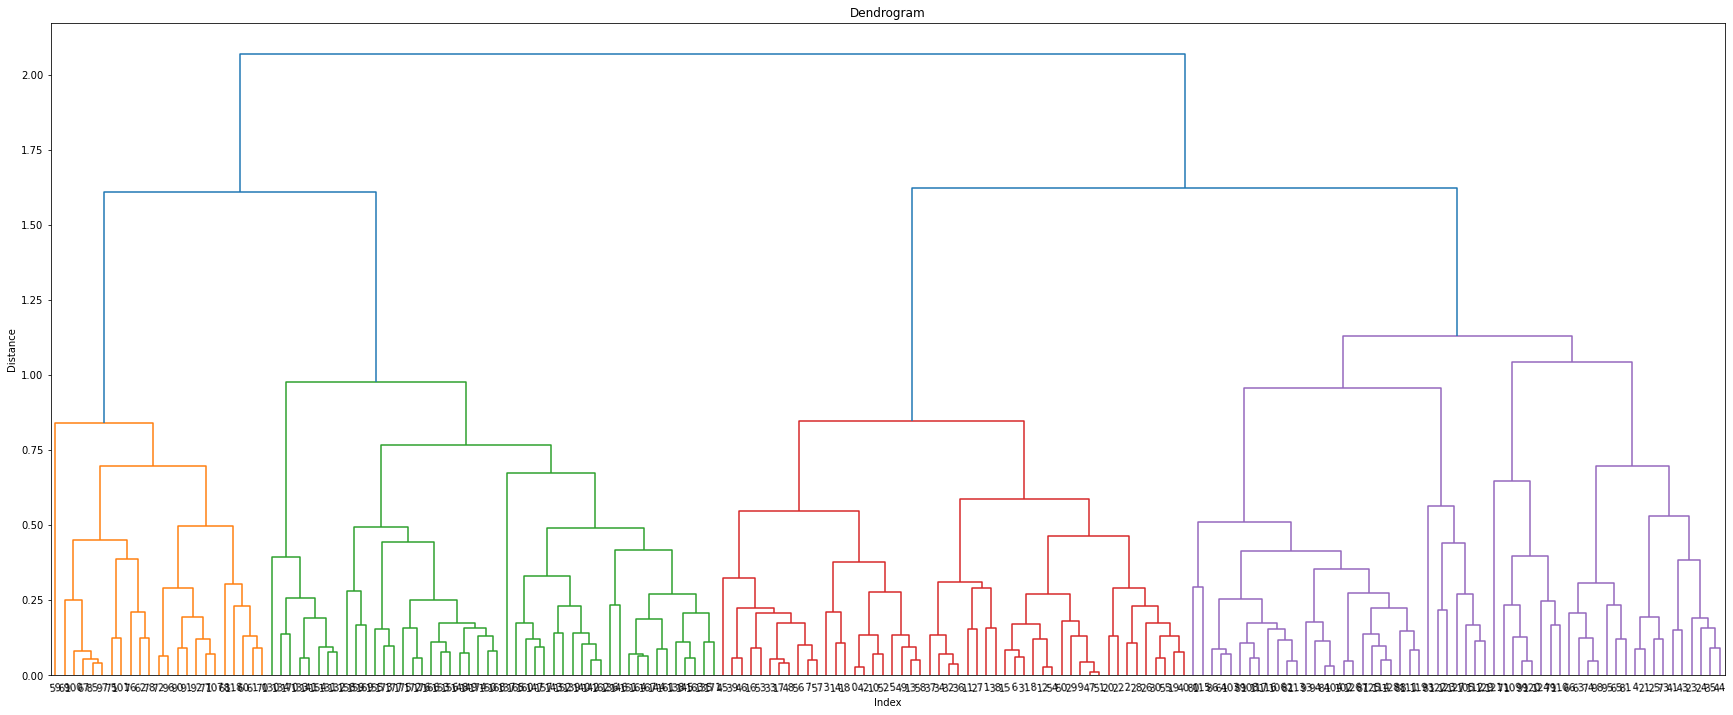

In [33]:
#Now we'll do h_clust on this data.
pbc =pca_data.iloc[:, 0:3]
z = linkage(pbc, method = "complete", metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [34]:
wd_comp1 = AgglomerativeClustering(n_clusters = 3 , linkage = "complete" ,affinity = "euclidean" ).fit(pbc)
wd_cluster_column1 = pd.Series(wd_comp1.labels_)

#now assign this matrix to to data set as a new column.

wdp['grouping']=wd_cluster_column1

#now take the grouping column to the 1st.

wd_hp = wdp.iloc[ : ,[13,0,1,2,3,4,6,7,8,9,10,11,12] ]


In [35]:
#Now we'll do kmeans on this.

###### scree plot or elbow curve ############
TWSS1 = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pbc)
    TWSS1.append(kmeans.inertia_)
    
TWSS1

[88.65301547493794,
 41.41801433099742,
 16.73413521732908,
 13.597234879534833,
 11.894850646717067,
 10.589040780281232,
 9.27622671906259,
 8.33703271447526,
 7.819348976090864]

Text(0, 0.5, 'total_within_SS')

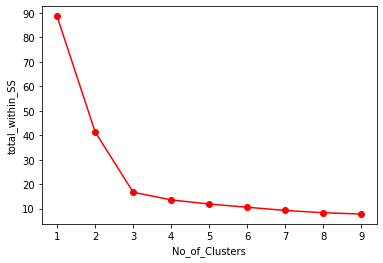

In [36]:
# Scree plot 
plt.plot(k, TWSS1, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [37]:

# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(pbc)

KMeans(n_clusters=3)

In [40]:
mb1 = pd.Series(model.labels_)  # converting numpy array into pandas series object  
wdp['category'] = mb1 # creating a  new column and assigning it to new column 
wd_kp = wdp.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12]]

                                        h-clust comparision
                                       

In [41]:
print(wd_h)
print(wd_hp)

     grouping  Alcohol  Malic   Ash  Alcalinity  Magnesium  Flavanoids  \
0           1    14.23   1.71  2.43        15.6        127        3.06   
1           1    13.20   1.78  2.14        11.2        100        2.76   
2           1    13.16   2.36  2.67        18.6        101        3.24   
3           1    14.37   1.95  2.50        16.8        113        3.49   
4           1    13.24   2.59  2.87        21.0        118        2.69   
..        ...      ...    ...   ...         ...        ...         ...   
173         2    13.71   5.65  2.45        20.5         95        0.61   
174         2    13.40   3.91  2.48        23.0        102        0.75   
175         2    13.27   4.28  2.26        20.0        120        0.69   
176         2    13.17   2.59  2.37        20.0        120        0.68   
177         2    14.13   4.10  2.74        24.5         96        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.6

   Clearly we can see both clusters are not same

                                   K_means Comparision
                                   

In [42]:
print(wd_k)
print(wd_kp)

     category  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  \
0           0    14.23   1.71  2.43        15.6        127     2.80   
1           0    13.20   1.78  2.14        11.2        100     2.65   
2           0    13.16   2.36  2.67        18.6        101     2.80   
3           0    14.37   1.95  2.50        16.8        113     3.85   
4           0    13.24   2.59  2.87        21.0        118     2.80   
..        ...      ...    ...   ...         ...        ...      ...   
173         2    13.71   5.65  2.45        20.5         95     1.68   
174         2    13.40   3.91  2.48        23.0        102     1.80   
175         2    13.27   4.28  2.26        20.0        120     1.59   
176         2    13.17   2.59  2.37        20.0        120     1.65   
177         2    14.13   4.10  2.74        24.5         96     2.05   

     Flavanoids  Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  \
0          3.06           0.28             2.29   5.64  1.04      3.92   

Here is also not the clusters are same